# PCAの実装
事前準備

In [31]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
cm = plt.get_cmap("tab10")

データの生成

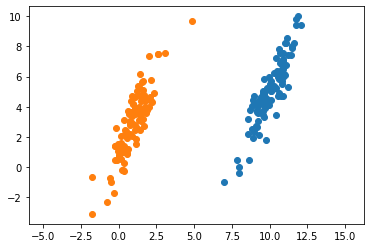

In [32]:
m1 = np.array([10, 5])
s1 = np.array([[1, 2], [2, 5]])
m2 = np.array([1, 3])
s2 = np.array([[1, 2], [2, 5]])

N = 100

################################################################
#numpyのmultivariate_normalを利用して，適当な平均と共分散行列からデータを生成しておきます
################################################################

x1 = np.random.multivariate_normal(m1, s1, N)
x2 = np.random.multivariate_normal(m2, s2, N)
plt.plot(x1[:,0], x1[:,1], 'o', color=cm(0))
plt.plot(x2[:,0], x2[:,1], 'o', color=cm(1))
plt.axis('equal')
plt.show()



固有ベクトルを固有値の大きい順に並べる関数

In [33]:
def eigsort(S):
  eigv_raw, u_raw = LA.eig(S)
  eigv_index = np.argsort(eigv_raw)[::-1]
  eigv = eigv_raw[eigv_index]
  u = u_raw[:, eigv_index]
  return [eigv, u]

In [34]:
#２つのデータを同一視
x = np.concatenate([x1,x2])
m = np.mean(x, axis=0)
S = (1/x.shape[0]) * ((x - m).T @ (x - m))

In [35]:
#ソートされた固有値と固有ベクトルを求める
[eig, u] = eigsort(S)

グラフ描写の準備

In [36]:
xlist = np.arange(-5,7.5,0.1)
ylist = m[1] + (u[[1],[0]]/u[[0],[0]]) * (xlist - m[0])

グラフ描写の準備


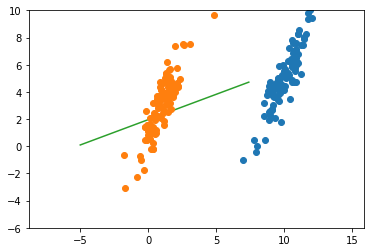

In [37]:
plt.plot(xlist, ylist, color=cm(2))
plt.plot(x1[:,0], x1[:,1], 'o', color=cm(0))
plt.plot(x2[:,0], x2[:,1], 'o', color=cm(1))
plt.axis('equal')
plt.ylim(-6,10)
plt.show()

# 寄与率の計算

In [38]:
contribution = round(eig[0]/(eig[0]+eig[1])*100, 1)
print("The first contribution:" + str(contribution)+"%")

The first contribution:88.0%


# sklearnを使った場合と比較

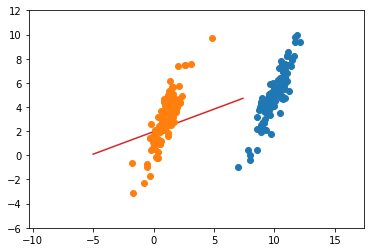

The first contribution:88.0%


In [39]:
from sklearn.decomposition import PCA

# ライブラリを使用してPCA
pca = PCA(n_components=2)
pca.fit(x)
PCA(n_components=2)

# ライブラリの出力から直線を表示
ytest = m[1] + (pca.components_[[0],[1]]/pca.components_[[0],[0]]) * (xlist - m[0])

# グラフ出力の準備
fig = plt.figure()
plt.plot(xlist, ytest, color=cm(3))
plt.plot(x1[:,0], x1[:,1], 'o')
plt.plot(x2[:,0], x2[:,1], 'o')
plt.axis('equal')
plt.ylim(-6,12)
plt.show()

# 寄与率の計算
contribution2 = round(pca.explained_variance_ratio_[0]*100, 1)
print("The first contribution:"+ str(contribution2) + "%")

結果が同じになったことを確認できました。